# Home Credit Default Risk EDA

### Completed by:  Gnana Chaithanya Rawali Male 
### Uid: u1448935


## Table of Contents

1. <a href="#1.-Introduction">Introduction</a>
2. <a href="#2.-Loading-Data">Loading Data</a>
3. <a href="#3.-Investigating-the-Train-dataset">Investigating the Train dataset</a>
4. <a href="#4.-Distribution-of-Target-Variable">Distribution of Target Variable</a>
5. <a href="#5.-EDA">EDA</a>
6. <a href="#6.-Finding-the-Correlation">Finding the Correlation</a>
7. <a href="#7.-Data-Cleaning:-Missing-Values">Data Cleaning: Missing Values</a>
8. <a href="#8.-Feature-Selection">Feature Selection</a>
9. <a href="#9.-Imputing-the-missing-values">Imputing the missing values</a>
10. <a href="#10.-Categorical-Data-Processing-(One-Hot-Encoding)">Categorical Data Processing (One-Hot Encoding)</a>
11. <a href="#11.-Exploring-Bureau-data">Exploring Bureau data</a>
12. <a href="#12.-Merging-bureau_data-and-train_data">Merging bureau_data and train_data</a>
13. <a href="#13.-Result">Result</a>
14. <a href="#14.-Future-Steps">Future Steps</a>



## 1. Introduction

Business Problem: Home Credit offers a secure and welcoming borrowing environment in an effort to modernize lending for the unbanked. To ensure that those who can repay are not denied access to credit while minimizing defaults, the fundamental difficulty is to accurately estimate whether a borrower will be able to repay a loan.



Project Goal: Our objective is to increase the precision of loan repayment estimates by utilizing exploratory data analysis (EDA) and statistical methods to acquire deep insights into Home Credit's loan application data. Through rigorous data investigation, we try to find patterns, trends, and potential risk factors within the dataset. Our main goal is to enable Home Credit to make data-driven lending decisions that lower the risk of default without denying credit to qualified customers. The improved accuracy of loan repayment predictions, which will support Home Credit's financial stability and customer happiness, will serve as a barometer for the project's performance.

## 2. Loading Data

### Importing required libraries


In [1]:
#importing libraries that would help for calculations, data cleaning,manipulation and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### Application_train and Application_test 

In [2]:

#reading the data from csv and saving it to the train_data DataFrame & test_data DataFrame
train_data = pd.read_csv("C:\\Users\\u1448935\\Downloads\\MSBA_Capstone\\Data\\home-credit-default-risk\\application_train.csv")
test_data = pd.read_csv("C:\\Users\\u1448935\\Downloads\\MSBA_Capstone\\Data\\home-credit-default-risk\\application_test.csv")


In [3]:
# viewing how the train_data look likes
train_data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# checking how many rows and columns does train_data set have
train_data.shape

(307511, 122)

In [5]:
# viewing how the test_data look likes
test_data.head()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# checking how many rows and columns does test_data set have
test_data.shape

(48744, 121)

application_train/application_test: These datasets contain information about each loan application at Home Credit. 

"application_train.csv",includes the TARGET variable.The TARGET column in the training data indicates whether the loan 
was repaid (0) or not repaid (1).

"application_test.csv",excludes the TARGET variable.

### Bureau dataset

In [7]:
#reading the data from csv and saving it to the bureau_data DataFrame
bureau_data = pd.read_csv("C:\\Users\\u1448935\\Downloads\\MSBA_Capstone\\Data\\home-credit-default-risk\\bureau.csv")

In [8]:
# viewing how the bureau_data look likes
bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [9]:
# checking how many rows and columns does bureau_data set have
bureau_data.shape

(1716428, 17)

"bureau.csv" provides data on clients' previous credits reported to the Credit Bureau. It is specific to clients with loans in our dataset, with multiple rows for each loan, representing the client's prior credits from different financial institutions.

### Bureau Balance dataset

In [10]:
#reading the data from csv and saving it to the bureau_balance_data DataFrame
bureau_balance_data = pd.read_csv("C:\\Users\\u1448935\\Downloads\\MSBA_Capstone\\Data\\home-credit-default-risk\\bureau_balance.csv")

In [11]:
# viewing how the bureau_balance_data look likes
bureau_balance_data.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [12]:
# checking how many rows and columns does bureau_balance_data set have
bureau_balance_data.shape

(27299925, 3)

"bureau_balance.csv" records monthly credit balances reported to the Credit Bureau, with each row representing a specific month for each previous credit. 

###  Credit card balance dataset

In [13]:
#reading the data from csv and saving it to the credit_balance_data DataFrame
credit_balance_data = pd.read_csv("C:\\Users\\u1448935\\Downloads\\MSBA_Capstone\\Data\\home-credit-default-risk\\bureau_balance.csv")

In [14]:
# viewing how the credit_balance_data look likes
credit_balance_data.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [15]:
# checking how many rows and columns does credit_balance_data set have
credit_balance_data.shape

(27299925, 3)

"credit_card_balance.csv" provides monthly reports of the balances associated with the applicant's prior credit cards held with Home Credit.

### Installment Payment dataset

In [16]:
#reading the data from csv and saving it to the installment_payment_data  DataFrame
installment_payment_data = pd.read_csv("C:\\Users\\u1448935\\Downloads\\MSBA_Capstone\\Data\\home-credit-default-risk\\installments_payments.csv")

In [17]:
# viewing how the installment_payment_data look likes
installment_payment_data.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [18]:
# checking how many rows and columns does installment_payment_data set have
installment_payment_data.shape

(13605401, 8)

"installments_payments.csv" captures the repayment history for prior Home Credit loans related to our sample loans, with one row for each payment made or missed.







### POS CASH balance dataset

In [19]:
#reading the data from csv and saving it to the  pos_cash_balance  DataFrame
pos_cash_balance = pd.read_csv("C:\\Users\\u1448935\\Downloads\\MSBA_Capstone\\Data\\home-credit-default-risk\\pos_cash_balance.csv")

In [20]:
# viewing how the pos_cash_balance look likes
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [21]:
# checking how many rows and columns does pos_cash_balance set have
pos_cash_balance.shape

(10001358, 8)


"POS_CASH_balance.csv" contains monthly snapshots of the applicant's prior point-of-sale (POS) and cash loans with Home Credit, with one row for each month of history for these previous credits related to loans in our dataset.

### Previous Application dataset

In [22]:
#reading the data from csv and saving it to the  previous_application DataFrame
previous_application = pd.read_csv("C:\\Users\\u1448935\\Downloads\\MSBA_Capstone\\Data\\home-credit-default-risk\\previous_application.csv")

In [23]:
# viewing how the previous_application look likes
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# checking how many rows and columns does previous_application set have
previous_application.shape

(1670214, 37)

"previous_application.csv" contains records of all prior loan applications made by clients who are included in our sample of loans.

## 3. Investigating the Train dataset

In [25]:
# Checking number of columns and rows in train dataset
train_data.shape

(307511, 122)

Train_data has 307511 rows and 122 columns

In [26]:
# checking the train_data information
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [27]:
#summary statistics of train_data
train_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [28]:
train_data.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

### Column types

In [29]:
# Number of each type of column
train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Train dataset have columns with float,int,object datatypes.

int64 and float64 are numeric variables which can correspond to discrete or continuous features. Whereas object columns contain strings and are categorical features.

In [30]:
# Number of unique classes in each object column
train_data.select_dtypes('object').apply(pd.Series.nunique, axis=0)


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## 4. Distribution of Target Variable

In [31]:
#  checking the count of target variable 
train_data.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

0 indicates client with No Payment difficulties
1 indicates client with Payment difficulties

In [32]:
# standarizing the target variable 
target_counts = train_data['TARGET'].value_counts(normalize= True)
target_counts

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [33]:
print(f'percentage of clients with payment difficulties: {train_data.TARGET.sum() / train_data.shape[0] * 100 :.2f}%')


percentage of clients with payment difficulties: 8.07%


In [34]:
## Calculate the majority class
majority_class = train_data['TARGET'].value_counts().idxmax()

# Calculate accuracy by counting the number of instances where the predicted class matches the actual class
correct_predictions = (train_data['TARGET'] == majority_class).sum()
total_instances = len(train_data)
accuracy = correct_predictions / total_instances

# Print the majority class and accuracy

print("Majority Class:", majority_class)
print("Accuracy:", accuracy)

Majority Class: 0
Accuracy: 0.9192711805431351


### "How are the target labels distributed? Did the majority of people return on time?"






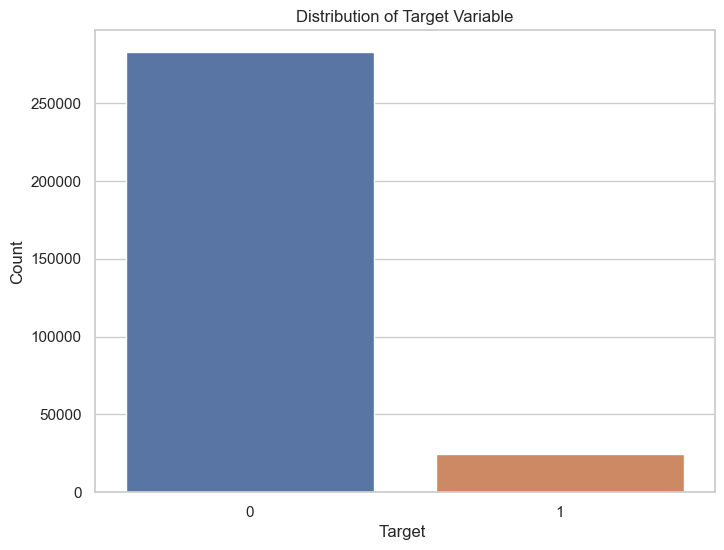

In [35]:
#plotting to know the distribution of the target variable

# Create a count plot
sns.set(style="whitegrid")  # Set the plot style
plt.figure(figsize=(8, 6))  # Set the figure size

# Create the count plot
sns.countplot(x='TARGET', data=train_data)

# Add labels and title
plt.xlabel('Target ')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')

# Show the plot

plt.show()


The target in the data is imbalanced as the graph shows that there are a lot more loans that were paid back compared to loans that weren't. To make our predictions better, we should pay extra attention to the loans that weren't paid back, like giving them more importance.

## 5. EDA

## Exploring by  Categorial type


### Which gender, Female or Male, faces more difficulties in repaying the loan?

In [36]:
# checking the count  of Code_gender variable 
code_gender_count = train_data['CODE_GENDER'].value_counts()
print(code_gender_count)


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


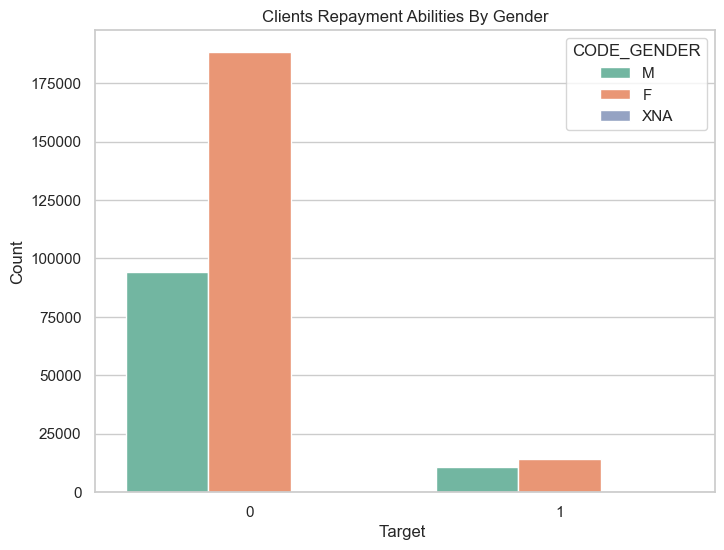

In [37]:
# Create a stacked bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.countplot(x='TARGET', hue='CODE_GENDER', data=train_data, palette='Set2')

# Add labels and title
plt.xlabel('Target ')
plt.ylabel('Count')
plt.title('Clients Repayment Abilities By Gender')

# Show the plot
plt.legend(title='CODE_GENDER')
plt.xticks(rotation=0)
plt.show()

There are nearly twice as many female clients as male clients. However, when we check how often loans are not paid back, it turns out that males are more likely to not return their loans.

### How do clients repayment abilities differ between cash loans and revolving loans?

In [38]:
# checking the count  of 'NAME_CONTRACT_TYPE' variable 
name_contract_type_count = train_data['NAME_CONTRACT_TYPE'].value_counts()
print(name_contract_type_count)

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


In [39]:
#Clients Repayment Abilities By Contract Type
ct = train_data.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Contract Type')
ct.sort_values(by='SK_ID_CURR', ascending=False)
ct.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Contract Type


,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,0,255011
1,Cash loans,1,23221
2,Revolving loans,0,27675
3,Revolving loans,1,1604


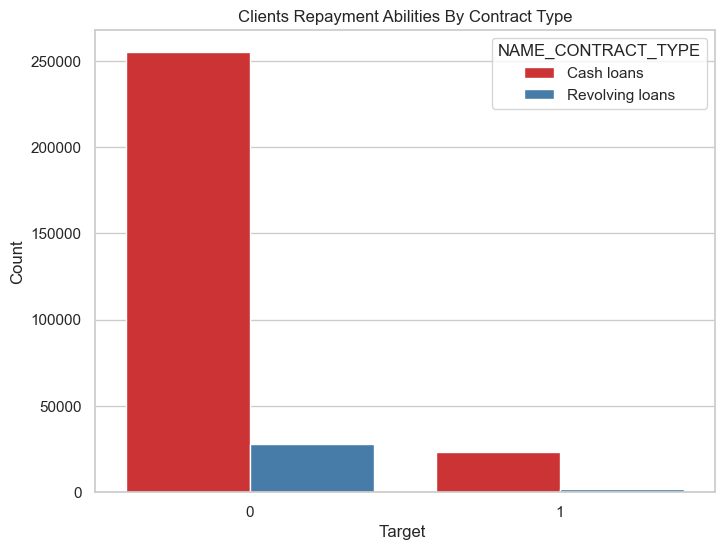

In [40]:
# Create a stacked bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.countplot(x='TARGET', hue='NAME_CONTRACT_TYPE', data=train_data, palette='Set1')

# Add labels and title
plt.xlabel('Target ')
plt.ylabel('Count')
plt.title('Clients Repayment Abilities By Contract Type')

# Show the plot
plt.legend(title='NAME_CONTRACT_TYPE')
plt.xticks(rotation=0)
plt.show()

Revolving loans make up only a tiny part of all the loans. But interestingly, when we look at how many of these revolving loans aren't paid back, it's a pretty high number compared to their small overall count.

### How do clients repayment abilities differ depending on whether they own a car or not?

In [41]:
# checking the count  of 'FLAG_OWN_CAR' variable 
flag_own_car_count = train_data['FLAG_OWN_CAR'].value_counts()
print(flag_own_car_count)
# checking the count  of 'FLAG_OWN_REALTY' variable 
flag_own_reality_count = train_data['FLAG_OWN_REALTY'].value_counts()
print(flag_own_reality_count)

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


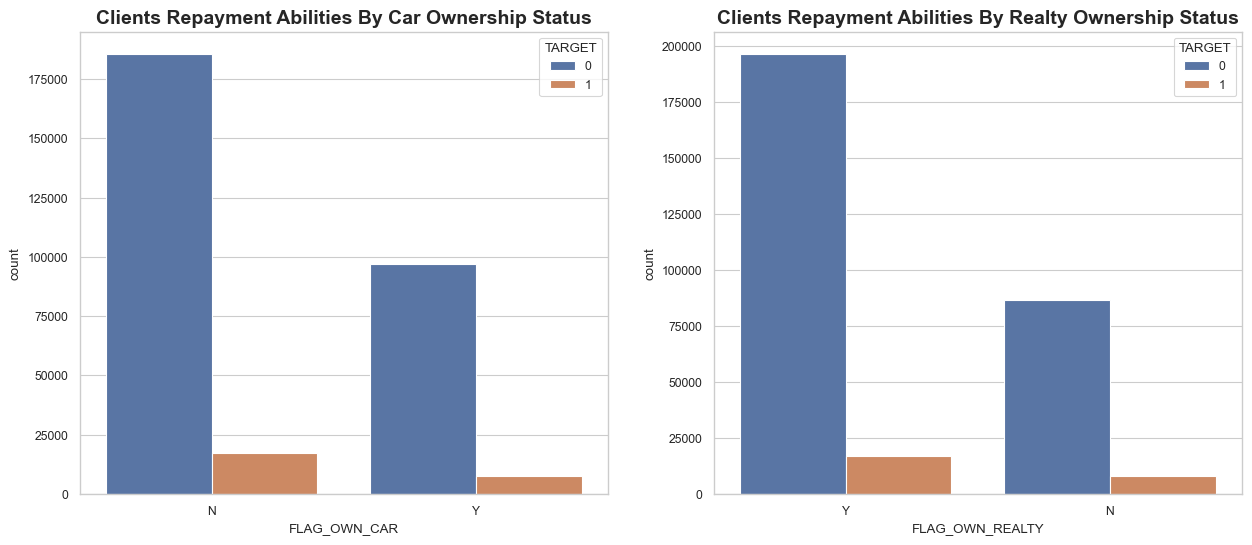

In [42]:

# Set the style and context
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1)

# Create a subplot with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Clients Repayment Abilities By Car Ownership Status
ax[0].set_title('Clients Repayment Abilities By Car Ownership Status', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data=train_data, hue='TARGET', ax=ax[0])

# Plot 2: Clients Repayment Abilities By Realty Ownership Status
ax[1].set_title('Clients Repayment Abilities By Realty Ownership Status', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data=train_data, hue='TARGET', ax=ax[1])

# Show the plots
plt.show()



Half of the clients own cars, and both car owners and non-owners have similar repayment rates.

More clients own real estate than those who don't, and both groups have similar repayment rates.

### SuiteType/ Income Type/Education Type/Family status Vs Target
### How does these types affect clients repayment abilities?

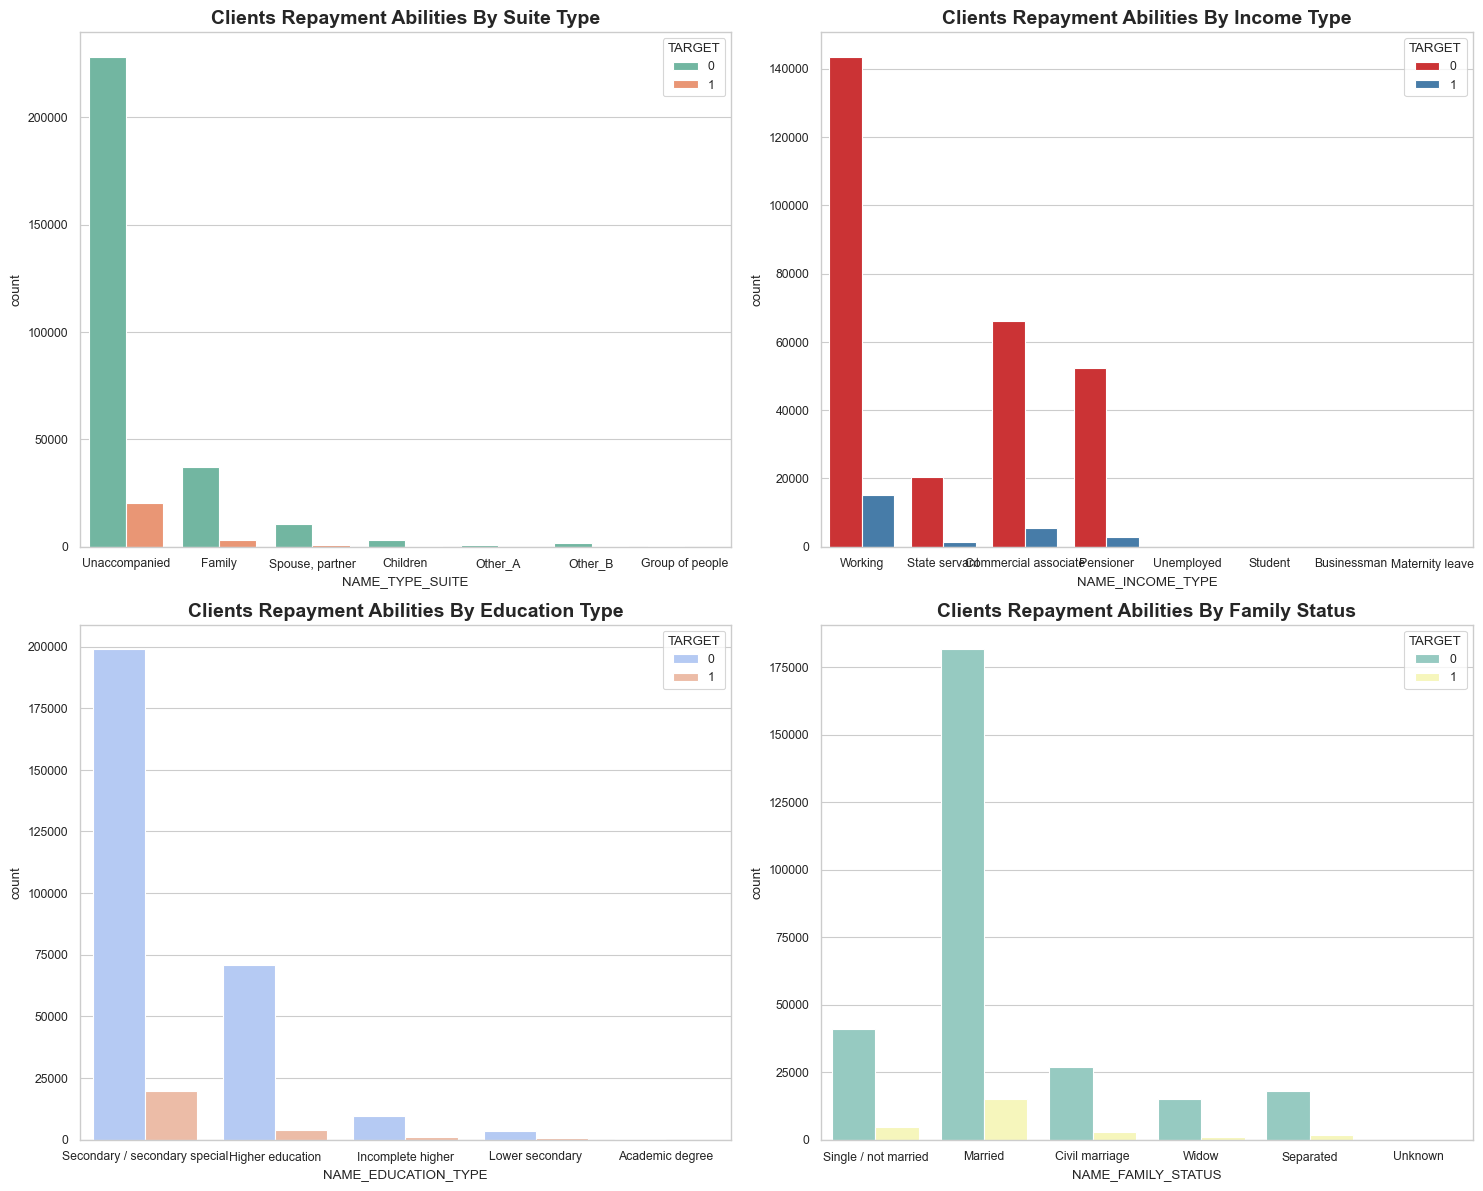

In [43]:

# Set the style and context
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12)) 

# Clients Repayment Abilities By Suite Type
sns.countplot(x='NAME_TYPE_SUITE', data=train_data, hue='TARGET', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Clients Repayment Abilities By Suite Type', fontweight='bold', fontsize=14)

# Clients Repayment Abilities By Income Type
sns.countplot(x='NAME_INCOME_TYPE', data=train_data, hue='TARGET', ax=axes[0, 1], palette='Set1')
axes[0, 1].set_title('Clients Repayment Abilities By Income Type', fontweight='bold', fontsize=14)

# Clients Repayment Abilities By Education Type
sns.countplot(x='NAME_EDUCATION_TYPE', data=train_data, hue='TARGET', ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Clients Repayment Abilities By Education Type', fontweight='bold', fontsize=14)

# Clients Repayment Abilities By Family Status
sns.countplot(x='NAME_FAMILY_STATUS', data=train_data, hue='TARGET', ax=axes[1, 1], palette='Set3')
axes[1, 1].set_title('Clients Repayment Abilities By Family Status', fontweight='bold', fontsize=14)

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()


Plot 1: The Unaccompained people have high  payment difficulties where as less is observed in case of family or with partners and none with other.

Plot 2.The primary source of income for loan applicants is typically from their jobs, followed by commercial roles, retirement, and government positions. However, applicants on maternity leave struggle the most with loan repayment, followed by those who are unemployed. Other income sources have more manageable loan repayment rates.

Plot 3.Most clients have basic education, followed by higher education, with very few holding academic degrees. Interestingly, clients with only basic education have the highest loan repayment challenges, while those with academic degrees tend to repay their loans reliably.


Plot 4.The majority of clients are married, followed by single individuals and those in civil partnerships. Surprisingly, clients in civil partnerships have the most difficulty repaying loans, while widows have the least difficulty, except for clients with unknown marital status.







### What is the connection between occupation type and clients repayment abilities?

In [44]:
train_data["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

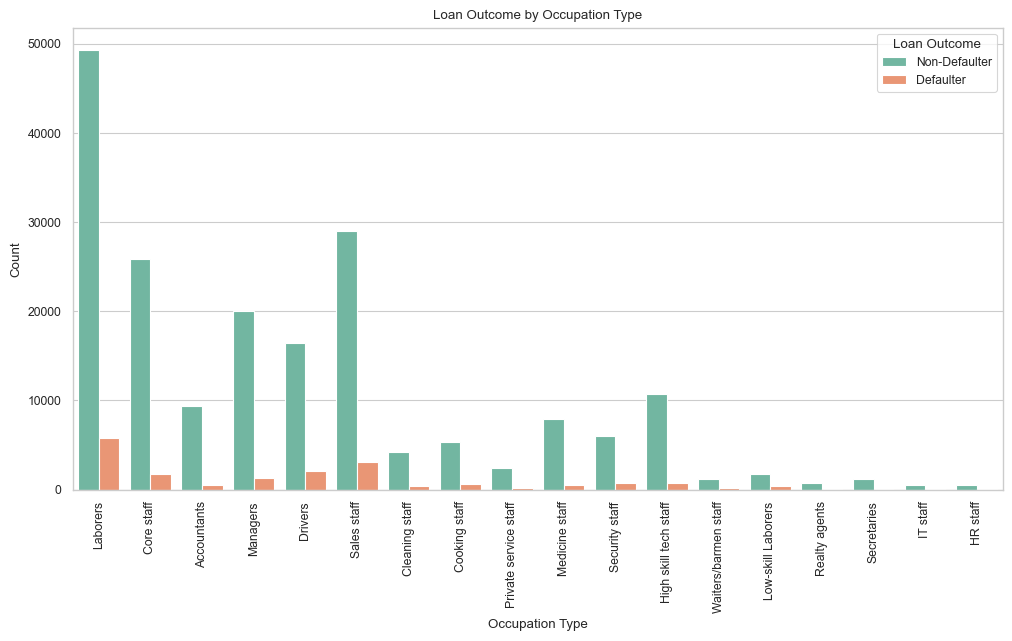

In [45]:

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.countplot(data= train_data, x='OCCUPATION_TYPE', hue='TARGET', palette='Set2')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Loan Outcome by Occupation Type')
plt.xticks(rotation=90)
plt.legend(title='Loan Outcome', labels=['Non-Defaulter', 'Defaulter'])
plt.show()


Many loans are taken by Laborers and Sales staff, while IT staff take the fewest loans. Low-skill Laborers have the highest percentage of unpaid loans, followed by Drivers, Waiters/barmen staff, Security staff, Laborers, and Cooking staff.

## Numerical Features Vs Target

### AMT_CREDIT vs TARGET

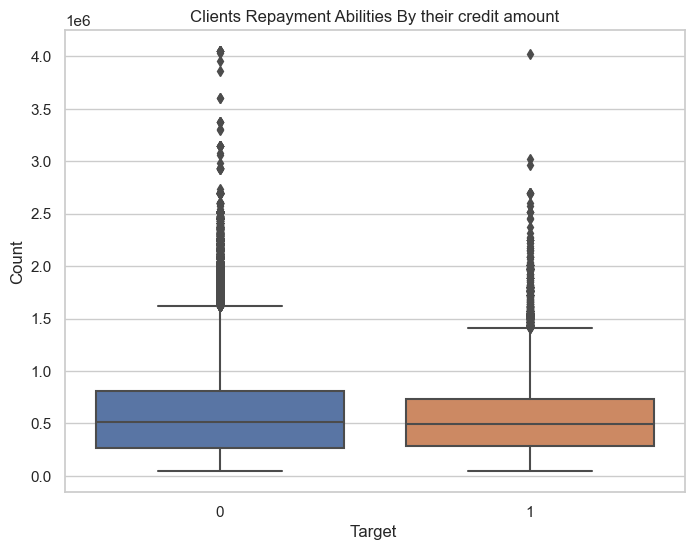

In [46]:

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.boxplot(x='TARGET', y='AMT_CREDIT', data=train_data)
# Add labels and title
plt.xlabel('Target ')
plt.ylabel('Count')
plt.title('Clients Repayment Abilities By their credit amount')

# Show the plot
plt.xticks(rotation=0)
plt.show()

The values in this column indicate the total credit amount that each borrower has been granted. Both payment and no payment difficulties are same for the clients, however this can be changed if there is a income difference between the clients. 

### Does having a kid influence repayment?

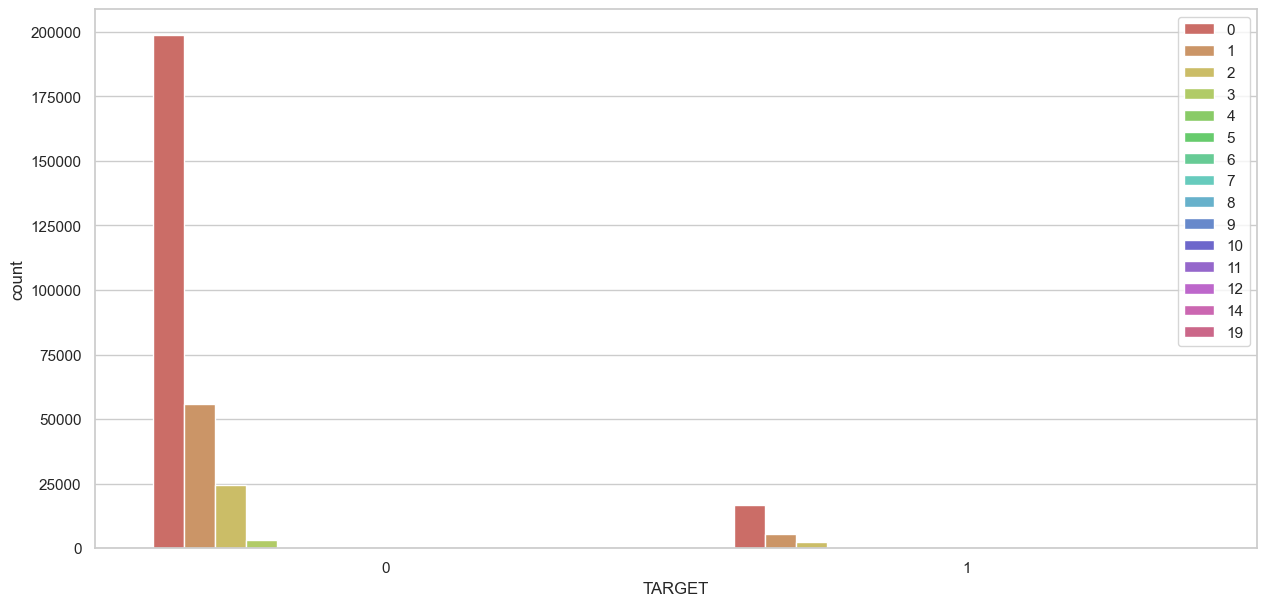

In [47]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='TARGET',hue='CNT_CHILDREN',data=train_data,palette="hls")
plt.legend(loc=1)

Borrowers without children mostly didn't face problems repaying their loans. Having children makes repaying harder and slower for clients.

### Age Vs Target

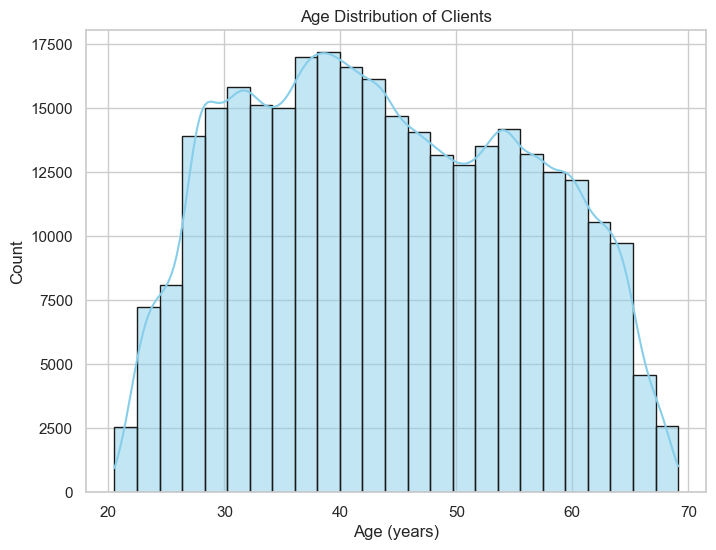

In [48]:

sns.set_style('whitegrid')
train_data['Age'] = abs(train_data['DAYS_BIRTH']) / 365

#histogram plot using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Age', bins=25, kde=True, color='skyblue', edgecolor='k')
plt.title('Age Distribution of Clients')
plt.xlabel('Age (years)')
plt.ylabel('Count')

# Show the plot
plt.show()


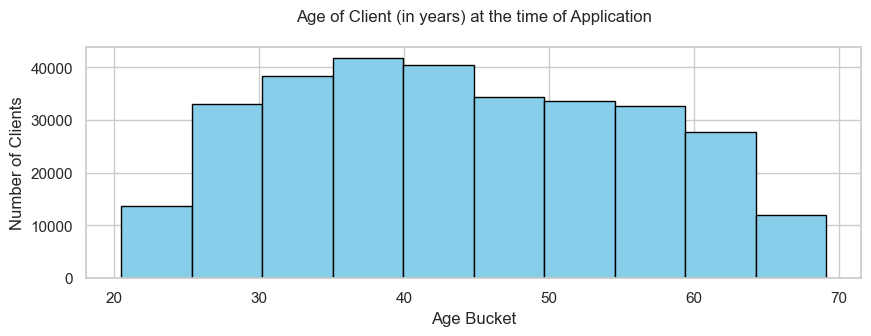

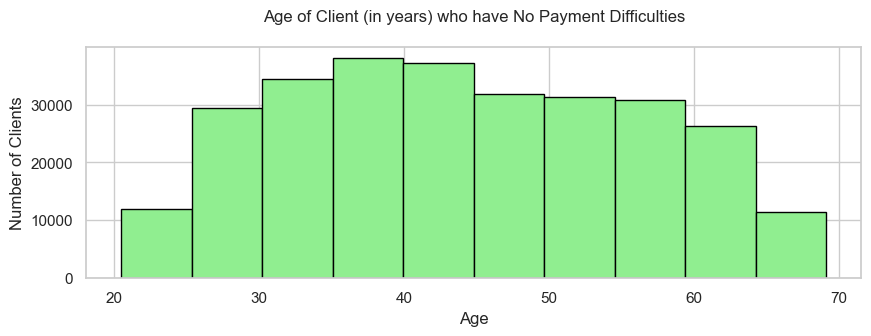

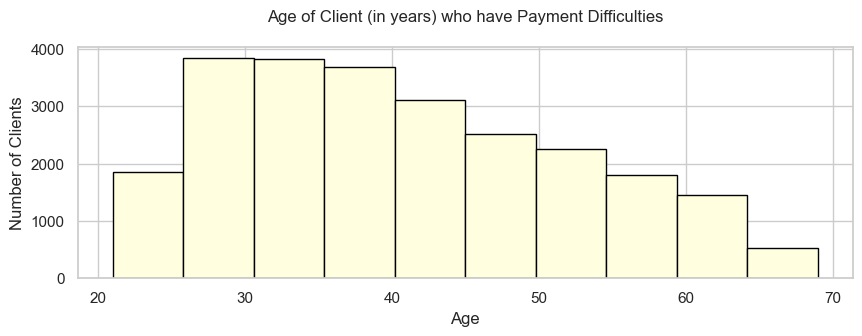

In [49]:

no_age = train_data[train_data['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = train_data[train_data['TARGET']==1]['DAYS_BIRTH'].values/-365

plt.figure(figsize=(10,3))
plt.hist(train_data['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='skyblue')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='lightgreen')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='lightyellow')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

The graphs shows that the younger the age, the greater is the loan repayment possibility.Younger individuals often have a higher likelihood of loan repayment because they typically have fewer financial responsibilities, better career prospects, shorter credit histories that can be favorable, lower debt burdens, and more flexible lifestyles, allowing them to allocate more of their income to loan repayment.However, Age is just one of many factors that lenders consider when assessing creditworthiness, and individual circumstances can vary widely.

## 6. Finding the Correlation 

 Calculating correlations helps to uncover patterns and relationships between variables, identify important predictors, assess data quality, and inform feature selection. These correlations help us gain insights, reduce dimensionality, and improve the understanding of data, aiding in both statistical analyses and machine learning model development.

In [50]:

correlation_with_target = train_data.corr()['TARGET'].sort_values()

# Display the correlation with 'TARGET'
print('Most Positive Correlations:\n', correlation_with_target.tail(10))
print('\nMost Negative Correlations:\n', correlation_with_target.head(10))


Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
Age                          -0.078239
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
Name: TARGET, dtype: float64


The top 3 variables that have strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. 

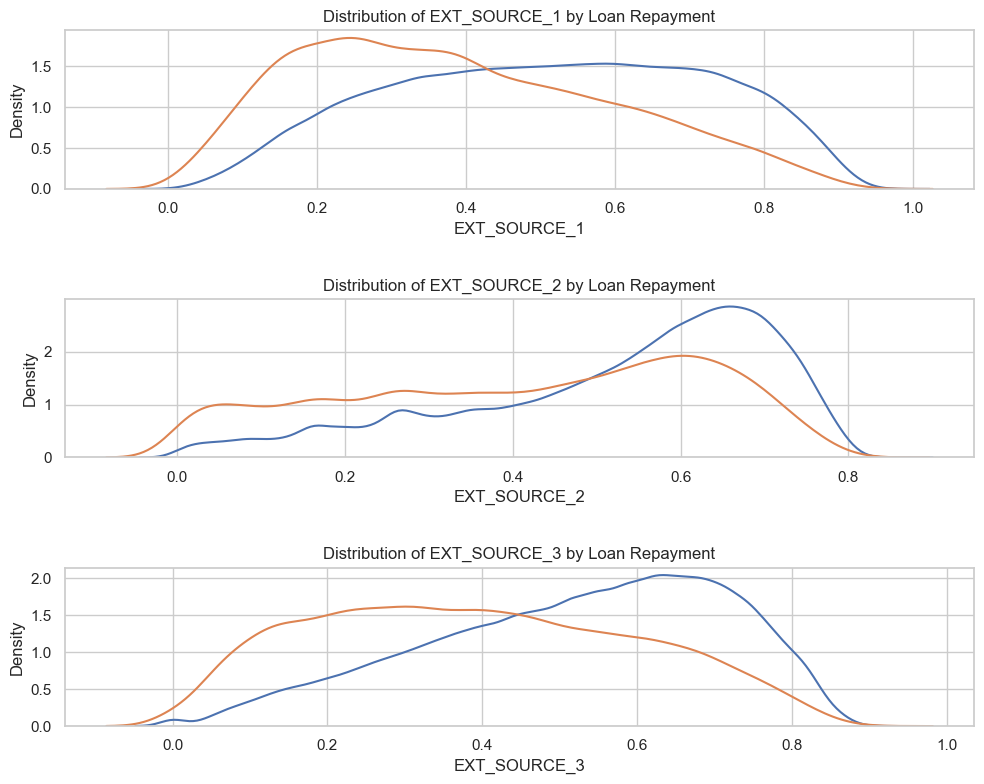

In [51]:


# Set the figure size
plt.figure(figsize=(10, 8))

# List of the three EXT_SOURCE features
ext_sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# Iterate through the sources
for i, source in enumerate(ext_sources):

    # Create a new subplot for each source
    plt.subplot(3, 1, i + 1)

    # Plot the distribution of repaid loans (target == 0)
    sns.kdeplot(train_data.loc[train_data['TARGET'] == 0, source], label='Repaid Loans')

    # Plot the distribution of loans that were not repaid (target == 1)
    sns.kdeplot(train_data.loc[train_data['TARGET'] == 1, source], label='Not Repaid Loans')

    # Label the plots
    plt.title('Distribution of {} by Loan Repayment'.format(source))
    plt.xlabel('{}'.format(source))
    plt.ylabel('Density')

# Adjust the layout for better spacing
plt.tight_layout(h_pad=2.5)

# Display the plots
plt.show()


"EXT_SOURCE_3 stands out as the feature with the most noticeable difference in values when we compare loan repayment and non-repayment. This suggests that this feature is connected to how likely an applicant is to pay back a loan

In [52]:
# strongest correlation EXT_SOURCE variables with Target
ext_data = train_data[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.155317,-0.160472,-0.178919
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000


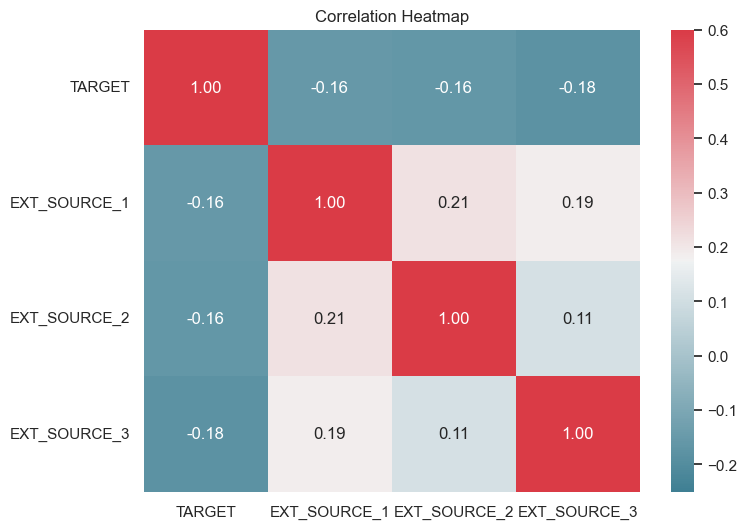

In [53]:

plt.figure(figsize=(8, 6))
corr_matrix = ext_data_corrs

# Define the colormap and limits
cmap = sns.diverging_palette(220, 10, as_cmap=True)
vmin, vmax = -0.25, 0.6

# Create the heatmap
sns.heatmap(corr_matrix, cmap=cmap, vmin=vmin, vmax=vmax, annot=True, fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


 EXT_SOURCE_1, EXT_SOURCE_2 & EXT_SOURCE_3 features show negative correlations with the target, which means that when the EXT_SOURCE values increase, clients tend to have a higher likelihood of repaying the loan."






## 7. Data Cleaning: Missing Values

Missing data can introduce biases, distort analyses, and impact the performance of machine learning models.Hence addressing them for better quality and reliability of the dataset.

In [54]:
#creating custome function to find the missing values

def display_missing_data_statistics(data):
    
    missing_values = data.isnull().sum()
    # Calculating missing data percentages for each column
    missing_percentage = (data.isna().mean() * 100).round(2)
    
    # Create a DataFrame to display missing data percentages
    missing_data = pd.DataFrame({'Column Name': missing_percentage.index,
                                 'Missing Values': missing_values,
                                 'Missing Percentage': missing_percentage.values})
    
    # Sorting the missing data
    missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False).reset_index(drop=True)
    print(missing_data.head(55))
    
    # Printing summary information
    print("\nSummary Information:")
    print(f"Total columns in the DataFrame: {data.shape[1]}")
    print(f"Columns with missing values: {missing_data[missing_data['Missing Values'] > 0].shape[0]}")

# Calling the function with  train_data
display_missing_data_statistics(train_data)


                     Column Name  Missing Values  Missing Percentage
0                COMMONAREA_MEDI          214865               69.87
1                COMMONAREA_MODE          214865               69.87
2                 COMMONAREA_AVG          214865               69.87
3       NONLIVINGAPARTMENTS_MEDI          213514               69.43
4       NONLIVINGAPARTMENTS_MODE          213514               69.43
5        NONLIVINGAPARTMENTS_AVG          213514               69.43
6             FONDKAPREMONT_MODE          210295               68.39
7          LIVINGAPARTMENTS_MEDI          210199               68.35
8          LIVINGAPARTMENTS_MODE          210199               68.35
9           LIVINGAPARTMENTS_AVG          210199               68.35
10                FLOORSMIN_MEDI          208642               67.85
11                FLOORSMIN_MODE          208642               67.85
12                 FLOORSMIN_AVG          208642               67.85
13               YEARS_BUILD_AVG  

In [55]:
train_data.shape

(307511, 123)

In [56]:
# # Specify the threshold for missing values (45% in this case)
missing_threshold = 0.45

# Identify columns with missing values exceeding the threshold
columns_to_remove = train_data.columns[train_data.isnull().mean() > missing_threshold]

# Remove all columns to be dropped, except 'EXT_SOURCE_1'
columns_to_remove = [col for col in columns_to_remove if col != 'EXT_SOURCE_1']
train_data_filtered = train_data.drop(columns=columns_to_remove)

# Now 'train_data_filtered' contains only columns with missing values <= 45%
train_data_filtered.shape

(307511, 75)

In [57]:
#Checking missing values

display_missing_data_statistics(train_data_filtered)

                   Column Name  Missing Values  Missing Percentage
0                 EXT_SOURCE_1          173378               56.38
1              OCCUPATION_TYPE           96391               31.35
2                 EXT_SOURCE_3           60965               19.83
3   AMT_REQ_CREDIT_BUREAU_YEAR           41519               13.50
4    AMT_REQ_CREDIT_BUREAU_QRT           41519               13.50
5    AMT_REQ_CREDIT_BUREAU_MON           41519               13.50
6   AMT_REQ_CREDIT_BUREAU_WEEK           41519               13.50
7    AMT_REQ_CREDIT_BUREAU_DAY           41519               13.50
8   AMT_REQ_CREDIT_BUREAU_HOUR           41519               13.50
9              NAME_TYPE_SUITE            1292                0.42
10    OBS_30_CNT_SOCIAL_CIRCLE            1021                0.33
11    DEF_30_CNT_SOCIAL_CIRCLE            1021                0.33
12    OBS_60_CNT_SOCIAL_CIRCLE            1021                0.33
13    DEF_60_CNT_SOCIAL_CIRCLE            1021                

In [58]:
train_data_filtered.shape

(307511, 75)

 ## 8. Feature Selection
 

In [59]:
corr_matrix = train_data_filtered.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
removing_high_correlation = [column for column in upper.columns if any(upper[column] > 0.75)]
removing_high_correlation

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'Age']

In [60]:
correlation_columns = ['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

correlations = train_data[correlation_columns + ['TARGET']].corr()['TARGET']
correlations

AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
FLAG_EMP_PHONE                 0.045982
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT_W_CITY    0.060893
LIVE_REGION_NOT_WORK_REGION    0.002819
LIVE_CITY_NOT_WORK_CITY        0.032518
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
TARGET                         1.000000
Name: TARGET, dtype: float64

In [61]:
dropping_columns_with_lesscorr = correlations[correlations < 0.04].index

In [62]:
train_data_filtered.drop(columns=dropping_columns_with_lesscorr, inplace=True)

In [63]:
train_data_filtered.shape

(307511, 68)

Flag document just flags the data whether customer submitted document or not so better to remove Flag documents, as described in the code, are binary columns that indicate whether a customer has submitted specific documents (e.g., identification documents, financial statements, etc.).


In [64]:

flag_documents_data = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [65]:
# removing those flag columns
train_data_filtered.drop(columns=flag_documents_data, inplace=True)
train_data_filtered.shape

(307511, 48)

## 9. Imputing the missing values

In [66]:
# Impute missing values in numerical columns with the mean
numerical_cols = train_data_filtered.select_dtypes(include=['number']).columns
train_data_filtered[numerical_cols] = train_data_filtered[numerical_cols].fillna(train_data_filtered[numerical_cols].mean())

In [67]:
# Impute missing values in categorical columns with mode
categorical_cols = train_data_filtered.select_dtypes(exclude=['number']).columns
train_data_filtered[categorical_cols] = train_data_filtered[categorical_cols].fillna(train_data_filtered[categorical_cols].mode().iloc[0])

In [68]:
# Finding out object datatype
train_data_filtered.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [69]:
#Checking missing values

display_missing_data_statistics(train_data_filtered)

                    Column Name  Missing Values  Missing Percentage
0                    SK_ID_CURR               0                 0.0
1                        TARGET               0                 0.0
2          REGION_RATING_CLIENT               0                 0.0
3   REGION_RATING_CLIENT_W_CITY               0                 0.0
4    WEEKDAY_APPR_PROCESS_START               0                 0.0
5       HOUR_APPR_PROCESS_START               0                 0.0
6    REG_REGION_NOT_LIVE_REGION               0                 0.0
7    REG_REGION_NOT_WORK_REGION               0                 0.0
8        REG_CITY_NOT_LIVE_CITY               0                 0.0
9        REG_CITY_NOT_WORK_CITY               0                 0.0
10            ORGANIZATION_TYPE               0                 0.0
11                 EXT_SOURCE_1               0                 0.0
12                 EXT_SOURCE_2               0                 0.0
13                 EXT_SOURCE_3               0 

In [70]:
num_unique_data_types = train_data_filtered.select_dtypes(include=['object']).nunique()
num_unique_data_types

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64


## 10. Categorical Data Processing (One-Hot Encoding)

In [71]:
# Get a list of categorical columns ( dtype='object')
categorical_columns = train_data_filtered.select_dtypes(include= 'object').columns.tolist()

# Display the list of categorical columns
print(categorical_columns)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


In [72]:
# Perform one-hot encoding on categorical columns
train_data_encoded = pd.get_dummies(train_data_filtered, columns=categorical_columns)


In [73]:
#checking whether the categorical variables are changed to numerical or not
list(train_data_encoded.select_dtypes('object'))

[]

## 11. Exploring Bureau data

In [74]:
# looking how does the bureau looks like
bureau_data.head()


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [75]:
bureau_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [76]:
bureau_data.shape

(1716428, 17)

In [77]:
bureau_data.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

In [78]:
bureau_data.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [79]:
# Calling the function with  bureau_data
display_missing_data_statistics(bureau_data)

               Column Name  Missing Values  Missing Percentage
0              AMT_ANNUITY         1226791               71.47
1   AMT_CREDIT_MAX_OVERDUE         1124488               65.51
2        DAYS_ENDDATE_FACT          633653               36.92
3     AMT_CREDIT_SUM_LIMIT          591780               34.48
4      AMT_CREDIT_SUM_DEBT          257669               15.01
5      DAYS_CREDIT_ENDDATE          105553                6.15
6            CREDIT_ACTIVE               0                0.00
7          CREDIT_CURRENCY               0                0.00
8              DAYS_CREDIT               0                0.00
9       CREDIT_DAY_OVERDUE               0                0.00
10            SK_ID_BUREAU               0                0.00
11      CNT_CREDIT_PROLONG               0                0.00
12          AMT_CREDIT_SUM              13                0.00
13  AMT_CREDIT_SUM_OVERDUE               0                0.00
14             CREDIT_TYPE               0             

## 12. Merging bureau_data and train_data

In [80]:
train_bureau_merged = train_data_encoded.merge(bureau_data.groupby('SK_ID_CURR').mean().reset_index(), 
                                            left_on='SK_ID_CURR', right_on='SK_ID_CURR', 
                                            how='left', validate='one_to_one')
train_bureau_merged.head()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100002,1,0,202500.0,406597.5,0.018801,-9461,-637,-3648.0,-2120,...,-349.0,-697.500000,1681.029,0.0,108131.945625,49156.2,7997.14125,0.0,-499.875,0.0
1,100003,0,0,270000.0,1293502.5,0.003541,-16765,-1188,-1186.0,-291,...,-544.5,-1097.333333,0.000,0.0,254350.125000,0.0,202500.00000,0.0,-816.000,NaN
2,100004,0,0,67500.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,-488.5,-532.500000,0.000,0.0,94518.900000,0.0,0.00000,0.0,-532.000,NaN
3,100006,0,0,135000.0,312682.5,0.008019,-19005,-3039,-9833.0,-2437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,-783.0,-783.000000,0.000,0.0,146250.000000,0.0,0.00000,0.0,-783.000,NaN


In [81]:
correlation_merge = train_bureau_merged.corr()
corr_target = correlation_merge["TARGET"].sort_values(ascending=False)
corr_target.head(30)

TARGET                                               1.000000
DAYS_CREDIT                                          0.089729
DAYS_BIRTH                                           0.078239
DAYS_CREDIT_UPDATE                                   0.068927
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
DAYS_ENDDATE_FACT                                    0.053200
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
DAYS_CREDIT_ENDDATE                                  0.046983
FLAG_EMP_PHONE                                       0.045982
REG_CITY_NOT_LIVE_CITY                               0.044395
DAYS_REG

From the above observation we see that the DAYS_CREDIT have highest correlation with respect to Target.

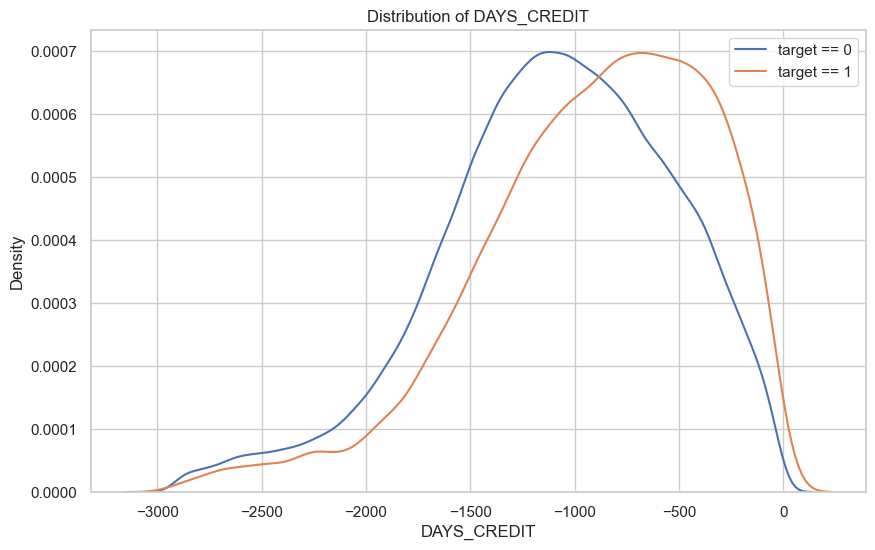

In [82]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot KDE for target 0 and target 1
for target in [0, 1]:
    sns.kdeplot(train_bureau_merged.loc[train_bureau_merged['TARGET'] == target, 'DAYS_CREDIT'], label=f'target == {target}')

# Set labels and title
plt.xlabel('DAYS_CREDIT')
plt.ylabel('Density')
plt.title('Distribution of DAYS_CREDIT')

# Add a legend
plt.legend()

# Show the plot
plt.show()


## 13. Result


list of observations from exploratory data analysis (EDA):

•	There are more loans paid back than not, so we should focus on the ones not paid back.

•	There are more female clients, but males are less likely to repay loans.

•	Revolving loans are a small part but have high non-repayment rates.

•	Car ownership doesn't affect repayment much, and real estate ownership is common.

•	Different income sources affect loan repayment differently.

•	Basic education clients struggle more, while academic degree holders repay loans better.

•	Married clients are common, civil partnerships struggle with repayment.

•	Laborers and Sales staff take many loans, but Low-skill Laborers struggle the most.

•	Total credit amount doesn't show a clear repayment pattern.

•	Clients without children face fewer repayment issues.

•	Younger individuals tend to repay loans better, possibly due to fewer financial responsibilities and better career prospects, but age isn't the only factor lenders consider.


## 14. Future Steps

The following are the additional steps that are in plan for future analysis:

•	Finding Outliers:  For ensuring data quality and understanding the potential impact of outliers on our analysis. We will employ statistical methods and visualization techniques, such as box plots and scatter plots, to detect and visualize outliers. 

•	Model Selection: Will be choosing appropriate classification algorithms for this problem.

•	Model Training: Training selected models on the data.


•	Hyperparameter Tuning: Fine-tune model parameters for optimal performance.

•	Model Evaluation and Validation: Assess model performance using cross-validation and relevant metrics.


•	Address Class Imbalance: Handle class imbalance using oversampling, undersampling, or weighted models.

•	Interpretability and Explainability: Understand and explain model predictions.


•	Model Deployment: Deploying model for making predictions in production.

•	Monitoring and Maintenance: Continuously monitoring, retraining, and updating the model as needed.



In [83]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.
